In [31]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv,Series, DataFrame
import math
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas.io.data as web
import datetime
import tensorflow as tf
from sklearn import svm, preprocessing
import matplotlib.pyplot as plt
import math
%matplotlib inline
np.set_printoptions(threshold=np.inf)



In [32]:
class KOSPIDATA:

    def __init__(self):
        start = datetime.datetime(1998, 5, 1)
        end = datetime.datetime(2016, 12, 31)
        kospi = web.DataReader("^KS11", "yahoo", start, end)

        self.arr_date= np.array(kospi.index)
        self.arr_open = np.array(kospi['Open'], dtype=float)
        self.arr_close= np.array(kospi['Adj Close'], dtype=float)
        self.arr_high= np.array(kospi.High, dtype=float)
        self.arr_low= np.array(kospi.Low, dtype=float)
        self.arr_volume= np.array(kospi.Volume, dtype=float)

In [33]:
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        
        if dataset[i+look_back] > dataset[i+look_back-1]:    
            dataY.append(1)
        elif dataset[i+look_back] <= dataset[i+look_back-1]:    
            dataY.append(0)

    return np.array(dataX), np.array(dataY) 

In [34]:
K = KOSPIDATA()

# FEATURES = ['high', 'low', 'open', 'close', 'volume']
FEATURES = ['high', 'low', 'open', 'close']

data = {'year': K.arr_date,
        'open': K.arr_open,
        'high': K.arr_high,
        'low': K.arr_low,
        'close': K.arr_close}

# df = DataFrame(data, columns=['year', 'high', 'low', 'open', 'close'])
df = DataFrame(data, columns=['year','close'])

In [35]:
dataset = df['close'].values

In [36]:
np.random.seed(7)

In [37]:
# dataset = dataset.reshape(-1,1)

In [38]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

C:\Users\UCIM-WORKSTATION\Anaconda64\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\UCIM-WORKSTATION\Anaconda64\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [39]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [47]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [48]:
trainX

array([[ 0.05736392,  0.04937506,  0.05103748],
       [ 0.04937506,  0.05103748,  0.04773829],
       [ 0.05103748,  0.04773829,  0.04185822],
       [ 0.04773829,  0.04185822,  0.03687094],
       [ 0.04185822,  0.03687094,  0.03929275],
       [ 0.03687094,  0.03929275,  0.04255603],
       [ 0.03929275,  0.04255603,  0.03736864],
       [ 0.04255603,  0.03736864,  0.04053444],
       [ 0.03736864,  0.04053444,  0.04234566],
       [ 0.04053444,  0.04234566,  0.04575261],
       [ 0.04234566,  0.04575261,  0.04222764],
       [ 0.04575261,  0.04222764,  0.03779965],
       [ 0.04222764,  0.03779965,  0.02662958],
       [ 0.03779965,  0.02662958,  0.01641388],
       [ 0.02662958,  0.01641388,  0.0171784 ],
       [ 0.01641388,  0.0171784 ,  0.02210923],
       [ 0.0171784 ,  0.02210923,  0.02905653],
       [ 0.02210923,  0.02905653,  0.02909245],
       [ 0.02905653,  0.02909245,  0.02262746],
       [ 0.02909245,  0.02262746,  0.02691692],
       [ 0.02262746,  0.02691692,  0.031

In [41]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [46]:
model = Sequential()
model.add(LSTM(32, input_dim=look_back))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())
history = model.fit(trainX, trainY, validation_data=(testX, testY), nb_epoch=200, batch_size=5, verbose=2)


C:\Users\UCIM-WORKSTATION\Anaconda64\lib\site-packages\ipykernel\__main__.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  from ipykernel import kernelapp as app
C:\Users\UCIM-WORKSTATION\Anaconda64\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, input_shape=(None, 3))`
  from ipykernel import kernelapp as app


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,641.0
Trainable params: 4,641.0
Non-trainable params: 0.0
_________________________________________________________________
None


C:\Users\UCIM-WORKSTATION\Anaconda64\lib\site-packages\keras\models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3090 samples, validate on 1520 samples
Epoch 1/200
4s - loss: 0.6950 - acc: 0.5165 - val_loss: 0.7066 - val_acc: 0.5066
Epoch 2/200
3s - loss: 0.6933 - acc: 0.5269 - val_loss: 0.6933 - val_acc: 0.5066
Epoch 3/200
4s - loss: 0.6957 - acc: 0.5201 - val_loss: 0.6937 - val_acc: 0.4934
Epoch 4/200
3s - loss: 0.6943 - acc: 0.5350 - val_loss: 0.6984 - val_acc: 0.5066
Epoch 5/200
3s - loss: 0.6950 - acc: 0.5298 - val_loss: 0.6931 - val_acc: 0.5066
Epoch 6/200
3s - loss: 0.6953 - acc: 0.5256 - val_loss: 0.6939 - val_acc: 0.4934
Epoch 7/200
3s - loss: 0.6928 - acc: 0.5259 - val_loss: 0.6973 - val_acc: 0.5066
Epoch 8/200
3s - loss: 0.6946 - acc: 0.5291 - val_loss: 0.6989 - val_acc: 0.5066
Epoch 9/200
3s - loss: 0.6956 - acc: 0.5298 - val_loss: 0.6939 - val_acc: 0.5066
Epoch 10/200
3s - loss: 0.6964 - acc: 0.5285 - val_loss: 0.7014 - val_acc: 0.5066
Epoch 11/200
4s - loss: 0.6939 - acc: 0.5307 - val_loss: 0.6938 - val_acc: 0.5066
Epoch 12/200
3s - loss: 0.6957 - acc: 0.5220 - val_loss: 0.

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])


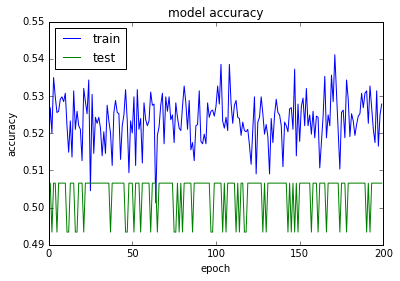

In [49]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

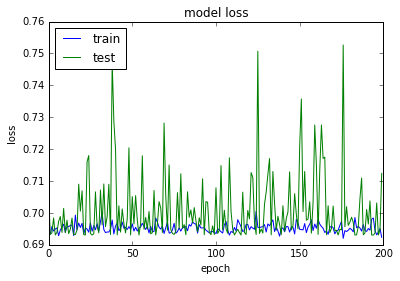

In [50]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
scores = model.evaluate(X_test, test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

NameError: name 'X_test' is not defined